In [1]:
import pandas as pd

In [13]:
import seaborn as sns

In [4]:
t = "https://mettl-arq.s3-ap-southeast-1.amazonaws.com/questions/jp-morgan/housing/housing_train.csv"
test = pd.read_csv(t)

In [3]:
testing_data.head()

,TID,Date,Property Type,OldvNew,Duration,AddressLine1,AddressLine2,Street,Locality,Town,Taluka,District,Postcode,Price Category
0,1226697,2019-04-01,F,N,L,UXCEBQ SYWKM,56,ZYHWKL KYUF,ZYHWKL XULFX,NREMYL GBQLBX,SBLMKUE HBFVYKFXORKB,SBLMKUE HBFVYKFXORKB,NG09 2CU,A
1,1226784,2019-04-01,S,N,F,XOYMVYKF,0,XBEXBQ KYUF,XRFEBXOUN,SORSOBXMBK,SORSOBXMBK,ZBXM XWXXBA,CY57 9KF,A
2,1226816,2019-04-01,F,N,L,"JKUSBZBEE SYWKM, 0457",UCUKMNBLM 56,XMKUMVYKF KYUF,OUEE JKBBL,HRKNRLJOUN,HRKNRLJOUN,ZBXM NRFEULFX,H52 8BM,A
3,1226838,2019-04-01,F,Y,L,MOB SOYSYEUMB DWUKMBK,51 KRPBK OYWXB,MKUTBSMWX ZUQ,GBQLXOUN,HKRXMYE,HUMO ULF LYKMO BUXM XYNBKXBM,HUMO ULF LYKMO BUXM XYNBKXBM,HX60 5JJ,A
4,1226845,2019-04-01,F,N,L,NUGBCBUSB NULXRYLX,VEUM 500,NUGBCBUSB UPBLWB,ORJOJUMB,EYLFYL,SUNFBL,JKBUMBK EYLFYL,L3 3BM,A


In [5]:
test.head()

,TID,Date,Property Type,OldvNew,Duration,AddressLine1,AddressLine2,Street,Locality,Town,Taluka,District,Postcode,Price,Price Category
0,1000,2018-01-01,F,N,L,9,NaN,XOUGBXCBUKB NBZX,NaN,ERLSYEL,ERLSYEL,ERLSYELXORKB,EL4 2BO,80.0,B
1,1001,2018-01-01,T,Y,F,02,NaN,OYYG ZUQ,NaN,NURFXMYLB,NURFXMYLB,GBLM,NB09 6VZ,218.5,A
2,1002,2018-01-01,D,N,F,32,NaN,XYNBKX CUKG UPBLWB,NaN,NUEPBKL,NUEPBKL OREEX,ZYKSBXMBKXORKB,ZK01 0XF,250.0,A
3,1003,2018-01-01,O,N,F,0,NaN,OUMOUZUQ SEYXB,NaN,EBRSBXMBK,EBRSBXMBK,EBRSBXMBK,EB1 3HI,6050.0,B
4,1004,2018-01-01,T,N,F,14,NaN,MBNBKURKB KYUF,NaN,CEQNYWMO,SRMQ YV CEQNYWMO,SRMQ YV CEQNYWMO,CE4 6WU,182.0,A


In [46]:
df1 = test
len(df1["Postcode"].unique() )

598400

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219110 entries, 0 to 1219109
Data columns (total 15 columns):
TID               1219110 non-null int64
Date              1219110 non-null object
Property Type     1219110 non-null object
OldvNew           1219110 non-null object
Duration          1219110 non-null object
AddressLine1      1219110 non-null object
AddressLine2      1219110 non-null object
Street            1219110 non-null object
Locality          1219110 non-null object
Town              1219110 non-null object
Taluka            1219110 non-null object
District          1219110 non-null object
Postcode          1213332 non-null object
Price             1219110 non-null float64
Price Category    1219110 non-null object
dtypes: float64(1), int64(1), object(13)
memory usage: 139.5+ MB


In [12]:
df1["Price"].describe()

count    1.219110e+06
mean     3.497564e+02
std      1.829584e+03
min      1.001100e+01
25%      1.455000e+02
50%      2.300000e+02
75%      3.550000e+02
max      5.692000e+05
Name: Price, dtype: float64

# Data Cleaning

In [38]:
all_data_na = (df1.isnull().sum() / len(df1)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
AddressLine2,86.497527
Locality,62.413974
Street,1.854796
Postcode,0.473952


In [42]:
len(df1["Postcode"].isnull())

1219110

In [48]:
#replacing null with None values
df1["AddressLine2"] = df1["AddressLine2"].fillna("None")
df1["Locality"] = df1["Locality"].fillna("None")
df1["Street"] = df1["Street"].fillna("None")

In [52]:
# droping values where pincode is null
df1.dropna(axis = 0, how ='any', inplace = True) 

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1213332 entries, 0 to 1219109
Data columns (total 15 columns):
TID               1213332 non-null int64
Date              1213332 non-null object
Property Type     1213332 non-null object
OldvNew           1213332 non-null object
Duration          1213332 non-null object
AddressLine1      1213332 non-null object
AddressLine2      1213332 non-null object
Street            1213332 non-null object
Locality          1213332 non-null object
Town              1213332 non-null object
Taluka            1213332 non-null object
District          1213332 non-null object
Postcode          1213332 non-null object
Price             1213332 non-null float64
Price Category    1213332 non-null object
dtypes: float64(1), int64(1), object(13)
memory usage: 148.1+ MB


# Feature Engineering

In [54]:
from sklearn.preprocessing import LabelEncoder

In [56]:
#encoding on labels

cols = ('OldvNew', 'Duration', 'Property Type', 'Price Category', 'Postcode')
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df1[c].values)) 
    df1[c] = lbl.transform(list(df1[c].values))

In [63]:
df1.head(5)

,TID,Date,Property Type,OldvNew,Duration,AddressLine1,AddressLine2,Street,Locality,Town,Taluka,District,Postcode,Price,Price Category
0,1000,2018-01-01,1,0,1,9,None,XOUGBXCBUKB NBZX,None,ERLSYEL,ERLSYEL,ERLSYELXORKB,78508,80.0,1
1,1001,2018-01-01,4,1,0,02,None,OYYG ZUQ,None,NURFXMYLB,NURFXMYLB,GBLM,346612,218.5,0
2,1002,2018-01-01,0,0,0,32,None,XYNBKX CUKG UPBLWB,None,NUEPBKL,NUEPBKL OREEX,ZYKSBXMBKXORKB,572077,250.0,0
3,1003,2018-01-01,2,0,0,0,None,OUMOUZUQ SEYXB,None,EBRSBXMBK,EBRSBXMBK,EBRSBXMBK,62842,6050.0,1
4,1004,2018-01-01,4,0,0,14,None,MBNBKURKB KYUF,None,CEQNYWMO,SRMQ YV CEQNYWMO,SRMQ YV CEQNYWMO,31006,182.0,0


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings

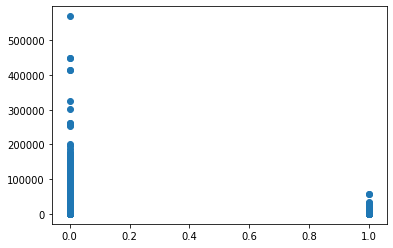

In [64]:
plt.scatter(df1.OldvNew , df1.Price)
plt.show()

In [35]:
dfx = df1[df1["Price"] >= 100000]
dfx['Town'].unique()

array(['EYLFYL', 'NULSOBXMBK', 'ZUEXUEE', 'OUERVUA', "HRXOYC'X XMYKMVYKF",
       'XMULXMBF', 'NUEPBKL', 'KBUFRLJ', 'LBZSUXMEB WCYL MQLB',
       'XOBVVRBEF', 'SOBENXVYKF', 'HKRJOMYL', 'EYWJOHYKYWJO',
       'NREMYL GBQLBX', 'OYFFBXFYL', 'HUMO'], dtype=object)

In [34]:
len(dfx['Town'].unique())

16

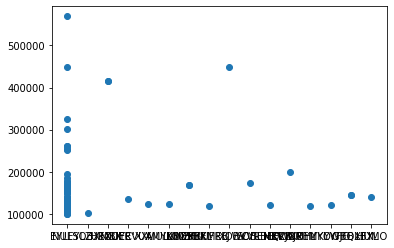

In [33]:
plt.scatter(dfx["Town"] , dfx.Price)
plt.show()

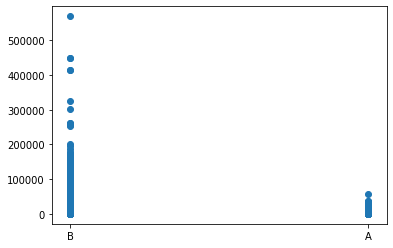

In [28]:
plt.scatter(df1["Price Category"] , df1.Price)
plt.show()

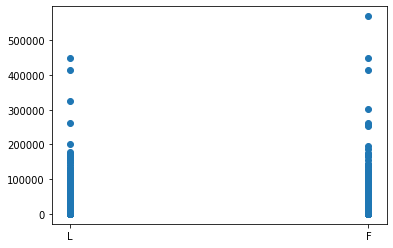

In [36]:
plt.scatter(df1["Duration"] , df1.Price)
plt.show()

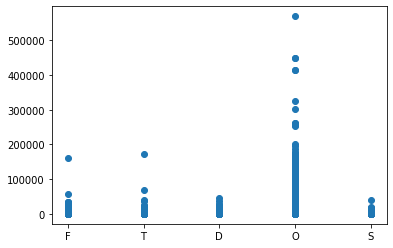

In [37]:
plt.scatter(df1["Property Type"] , df1.Price)
plt.show()

# Modelling 

In [66]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb